# Maximizing as minimum

**Adapted from**: [Floudas1999; Section 4.10](@cite), [Laurent2008; Example 6.23](@cite) and [Lasserre2009; Table 5.1](@cite)

## Introduction

Consider the polynomial optimization problem from [Floudas1999; Section 4.10](@cite)
of minimizing the linear function $-x_1 - x_2$
over the basic semialgebraic set defined by the inequalities
$x_2 \le 2x_1^4 - 8x_1^3 + 8x_1^2 + 2$,
$x_2 \le 4x_1^4 - 32x_1^3 + 88x_1^2 - 96x_1 + 36$ and the box constraints
$0 \le x_1 \le 3$ and $0 \le x_2 \le 4$,

In [1]:
using DynamicPolynomials
@polyvar x[1:2]
p = -sum(x)
using SumOfSquares
f1 = 2x[1]^4 - 8x[1]^3 + 8x[1]^2 + 2
f2 = 4x[1]^4 - 32x[1]^3 + 88x[1]^2 - 96x[1] + 36
K = @set x[1] >= 0 && x[1] <= 3 && x[2] >= 0 && x[2] <= 4 && x[2] <= f1 && x[2] <= f2

Basic semialgebraic Set defined by no equality
6 inequalities
 x[1] ≥ 0
 3 - x[1] ≥ 0
 x[2] ≥ 0
 4 - x[2] ≥ 0
 2 - x[2] + 8*x[1]^2 - 8*x[1]^3 + 2*x[1]^4 ≥ 0
 36 - x[2] - 96*x[1] + 88*x[1]^2 - 32*x[1]^3 + 4*x[1]^4 ≥ 0


As we can observe below, the bounds on `x[2]` could be dropped and
optimization problem is equivalent to the maximization of `min(f1, f2)`
between `0` and `3`.

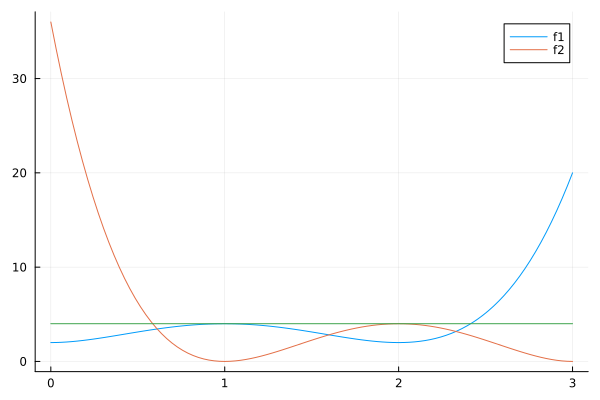

In [2]:
xs = range(0, stop = 3, length = 100)
using Plots
plot(xs, f1.(xs), label = "f1")
plot!(xs, f2.(xs), label = "f2")
plot!(xs, 4 * ones(length(xs)), label = nothing)

We will now see how to find the optimal solution using Sum of Squares Programming.
We first need to pick an SDP solver, see [here](https://jump.dev/JuMP.jl/v1.12/installation/#Supported-solvers) for a list of the available choices.

In [3]:
import Clarabel
solver = Clarabel.Optimizer

Clarabel.MOIwrapper.Optimizer

A Sum-of-Squares certificate that $p \ge \alpha$ over the domain `S`, ensures that $\alpha$ is a lower bound to the polynomial optimization problem.
The following function searches for the largest lower bound and finds zero using the `d`th level of the hierarchy`.

In [4]:
function solve(d)
    model = SOSModel(solver)
    @variable(model, α)
    @objective(model, Max, α)
    @constraint(model, c, p >= α, domain = K, maxdegree = d)
    optimize!(model)
    println(solution_summary(model))
    return model
end

solve (generic function with 1 method)

The first level of the hierarchy gives a lower bound of `-7``

In [5]:
model4 = solve(4)
nothing # hide

-------------------------------------------------------------
           Clarabel.jl v0.9.0  -  Clever Acronym              
                   (c) Paul Goulart                          
                University of Oxford, 2022                   
-------------------------------------------------------------

problem:
  variables     = 31
  constraints   = 40
  nnz(P)        = 0
  nnz(A)        = 73
  cones (total) = 6
    : Zero        = 1,  numel = 10
    : PSDTriangle = 5,  numel = (6,6,6,6,6)

settings:
  linear algebra: direct / qdldl, precision: Float64
  max iter = 200, time limit = Inf,  max step = 0.990
  tol_feas = 1.0e-08, tol_gap_abs = 1.0e-08, tol_gap_rel = 1.0e-08,
  static reg : on, ϵ1 = 1.0e-08, ϵ2 = 4.9e-32
  dynamic reg: on, ϵ = 1.0e-13, δ = 2.0e-07
  iter refine: on, reltol = 1.0e-13, abstol = 1.0e-12, 
               max iter = 10, stop ratio = 5.0
  equilibrate: on, min_scale = 1.0e-04, max_scale = 1.0e+04
               max iter = 10

iter    pcost        dcost  

The second level improves the lower bound

In [6]:
model5 = solve(5)
nothing # hide

-------------------------------------------------------------
           Clarabel.jl v0.9.0  -  Clever Acronym              
                   (c) Paul Goulart                          
                University of Oxford, 2022                   
-------------------------------------------------------------

problem:
  variables     = 108
  constraints   = 128
  nnz(P)        = 0
  nnz(A)        = 266
  cones (total) = 7
    : Zero        = 1,  numel = 21
    : Nonnegative = 1,  numel = 2
    : PSDTriangle = 5,  numel = (21,21,21,21,21)

settings:
  linear algebra: direct / qdldl, precision: Float64
  max iter = 200, time limit = Inf,  max step = 0.990
  tol_feas = 1.0e-08, tol_gap_abs = 1.0e-08, tol_gap_rel = 1.0e-08,
  static reg : on, ϵ1 = 1.0e-08, ϵ2 = 4.9e-32
  dynamic reg: on, ϵ = 1.0e-13, δ = 2.0e-07
  iter refine: on, reltol = 1.0e-13, abstol = 1.0e-12, 
               max iter = 10, stop ratio = 5.0
  equilibrate: on, min_scale = 1.0e-04, max_scale = 1.0e+04
               m

The third level finds the optimal objective value as lower bound...

In [7]:
model7 = solve(7)
nothing # hide

-------------------------------------------------------------
           Clarabel.jl v0.9.0  -  Clever Acronym              
                   (c) Paul Goulart                          
                University of Oxford, 2022                   
-------------------------------------------------------------

problem:
  variables     = 288
  constraints   = 323
  nnz(P)        = 0
  nnz(A)        = 739
  cones (total) = 8
    : Zero        = 1,  numel = 36
    : PSDTriangle = 7,  numel = (55,55,55,55,...,55)

settings:
  linear algebra: direct / qdldl, precision: Float64
  max iter = 200, time limit = Inf,  max step = 0.990
  tol_feas = 1.0e-08, tol_gap_abs = 1.0e-08, tol_gap_rel = 1.0e-08,
  static reg : on, ϵ1 = 1.0e-08, ϵ2 = 4.9e-32
  dynamic reg: on, ϵ = 1.0e-13, δ = 2.0e-07
  iter refine: on, reltol = 1.0e-13, abstol = 1.0e-12, 
               max iter = 10, stop ratio = 5.0
  equilibrate: on, min_scale = 1.0e-04, max_scale = 1.0e+04
               max iter = 10

iter    pcost   

...and proves it by exhibiting the minimizer.

In [8]:
ν7 = moment_matrix(model7[:c])
η = atomic_measure(ν7, 1e-3) # Returns nothing as the dual is not atomic

Atomic measure on the variables x[1], x[2] with 1 atoms:
 at [2.3295201628688242, 3.17849313493404] with weight 0.9999999696085651

We can indeed verify that the objective value at `x_opt` is equal to the lower bound.

In [9]:
x_opt = η.atoms[1].center
p(x_opt)

-5.508013297802864

We can see visualize the solution as follows:

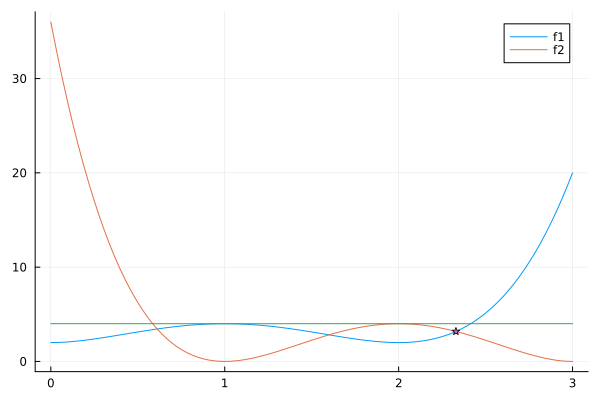

In [10]:
scatter!([x_opt[1]], [x_opt[2]], markershape = :star, label = nothing)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*